<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Probability: The Mathematics of Uncertainty
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 1</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Probability theory

- systematic understanding of processes with uncertainty.
- quantification and manipulation of uncertainty





E.g., driving along in the southern Australian outback:

- Drive up on an adult koala
- Ask if you can measure his/her height (consent is important!)
- Measure the height

<div align = "center">
<img src="Images/surprised_koala.jpg" align = "center" width="300"/>
</div>
<center> A surprised koala.</center>

In [1]:
from scipy.stats import norm
koala_height_gen = \
(norm.rvs(loc = 75, scale = 15, size = 1) 
 for x in range(500) )

In [2]:
# measure that surprised koala's height
consenting_koala1 = next(koala_height_gen)
consenting_koala1

array([94.85241681])

Now roll up on another unsuspecting, consenting koala:

In [3]:
# Drive up on another koala: 
consenting_koala2 = next(koala_height_gen)
consenting_koala2

array([65.15218374])

In [4]:
consenting_koala1

array([94.85241681])

The outcome of the measurement of any given koala's height is unknown
- the outcome is a *random* event.
- uncertainty in what the value might be for any given koala


But may want to quantify:

- what, on the *average*, we might expect
- quantify uncertainty (the characteristic range of values)
- likelihood that a koala's height falls within a given range

<div align = "center">
<img src="Images/koala.png" align = "center" width="300"/>
</div>
<center> Average koala height of 75 cm </center>

#### This sort of quantification of uncertainty
- Absolutely central to data science
- Making predictions and classifications most probable given limited information.
    - i.e. in the face of uncertainty

**Building a classifier: a common data science / machine-learning task**

<div align = "center">
<img src="Images/southern_vs_northern_koala.jpg" align = "center" width="300"/>
</div>
<center> Southern vs. northern koala </center>


We are told a koala weighs 22 lbs. Is this a southern or a northern koala?

A statistically sound determination of subspecies based on weight will depend on:
- characteristic range (e.g, mean / standard deviation) of Southern koala
- characteristic range (e.g, mean / standard deviation) of northern koala

E.g. the statistical distributions of both populations.

In [5]:
%%capture koalaweights

# Weight distributions of northern vs southern koalas
import matplotlib.pyplot as plt

southern_koala = norm.rvs(loc = 24, scale = 2.5, size = 800, random_state = 42)
northern_koala = norm.rvs(loc = 14, scale = 3, size = 800, random_state = 42)

fig, ax = plt.subplots()

ax.hist(southern_koala, color = 'r', histtype = 'step')
ax.hist(northern_koala, color = 'b', histtype = 'step')
ax.set_xlabel('Koala weight [lbs]')
ax.set_ylabel('Counts')
ax.axvline(22, c = 'g', linestyle = '--')
plt.annotate('Our Koala', xy = (22, 200), xytext = (16.5, 210), size = 11, c = 'g')
plt.annotate('Northern Koala', xy = (4, 190), xytext = (4, 190), size = 11, c = 'b')
plt.annotate('Southern Koala', xy = (26, 190), xytext = (26, 190), size = 11, c = 'r')

plt.show()

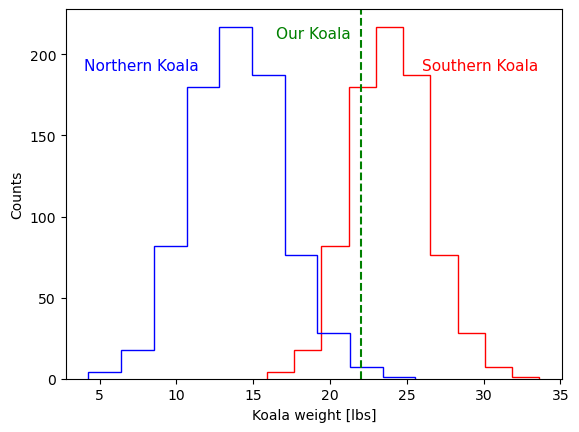

In [6]:
koalaweights()

Weight measurement:
- Is our koala a northern or southern Koala?

Quantification of: 

- the sub-population means
- their spreads (uncertainty)
- probability that a southern (northern) koala would have weight 22

#### Probability theory: the branch of mathematics 
- lets us reason and calculate these various quantities derived from random events

#### Random processes, outcomes, and sample spaces:

Random process: 

- repeated query or measurement of given quantity does not produce reproducible outcome





Example: throwing a fair die

<center><img src="Images/dice.jpg" width="400"/></center>



Result of a given throw? Random process.

- Possible outcomes: 1, 2, 3, 4, 5, 6
- Sample space $\Omega$: set of all possible outcomes of a trial:
    - $ \Omega = \{1, 2, 3, 4, 5, 6\} $

Sample space type: Discrete and finite

- outcomes can be represented simply as a finite set.

In [7]:
die_sample_space = {1, 2, 3, 4, 5, 6}
print(type(die_sample_space))
die_sample_space

<class 'set'>


{1, 2, 3, 4, 5, 6}

Python has a special datatype for sets:
- many set specific operations:
    - intersection
    - union
    - difference
    - etc.

Results for a given throw are drawn **at random** from this sample space set.

In [8]:
# base python's library for all thing random
import random

Rolling a fair die: this samples the set evenly.

In [9]:
random.sample(list(die_sample_space), 1)

[5]

#### The event space 
- $ B $, the event space, is the set of all subsets of sample space $\Omega$.

In [10]:
from functools import reduce

ps = lambda s: reduce(lambda P, x: P + [subset | {x} for subset in P], s, [set()])

die_event_space = ps(die_sample_space)
print(die_event_space)

[set(), {1}, {2}, {1, 2}, {3}, {1, 3}, {2, 3}, {1, 2, 3}, {4}, {1, 4}, {2, 4}, {1, 2, 4}, {3, 4}, {1, 3, 4}, {2, 3, 4}, {1, 2, 3, 4}, {5}, {1, 5}, {2, 5}, {1, 2, 5}, {3, 5}, {1, 3, 5}, {2, 3, 5}, {1, 2, 3, 5}, {4, 5}, {1, 4, 5}, {2, 4, 5}, {1, 2, 4, 5}, {3, 4, 5}, {1, 3, 4, 5}, {2, 3, 4, 5}, {1, 2, 3, 4, 5}, {6}, {1, 6}, {2, 6}, {1, 2, 6}, {3, 6}, {1, 3, 6}, {2, 3, 6}, {1, 2, 3, 6}, {4, 6}, {1, 4, 6}, {2, 4, 6}, {1, 2, 4, 6}, {3, 4, 6}, {1, 3, 4, 6}, {2, 3, 4, 6}, {1, 2, 3, 4, 6}, {5, 6}, {1, 5, 6}, {2, 5, 6}, {1, 2, 5, 6}, {3, 5, 6}, {1, 3, 5, 6}, {2, 3, 5, 6}, {1, 2, 3, 5, 6}, {4, 5, 6}, {1, 4, 5, 6}, {2, 4, 5, 6}, {1, 2, 4, 5, 6}, {3, 4, 5, 6}, {1, 3, 4, 5, 6}, {2, 3, 4, 5, 6}, {1, 2, 3, 4, 5, 6}]


Each element of the event space:
- a set corresponding to a subset of observations in $\Omega$

For result of a roll we ask:

Did we get either a 1, 2 or 4? Getting a 1, 2 or 4 is an **event**.

In [11]:
# An event example:
die_event_space[11]

{1, 2, 4}

Note that event space contains:
- sample space $\Omega$

In [12]:
die_sample_space in die_event_space

True

In [13]:
die_event_space[-1]

{1, 2, 3, 4, 5, 6}

**Probability**

A function $$ P: B \rightarrow \mathbb{R} $$

maps from the event space to a real number.

e.g.:
    
$$ P(\{1\}) = \frac{1}{6} $$
$$ P(\{1, 2, 4\}) = \frac{1}{2} $$ 

The probability function must satisfy a few requirements:

**Requirement 1**

$$ P(b) \geq 0, \forall b \in B $$

A probability must be positive.

**Requirement 2**

$$ P(\Omega) = 1 $$

or

$$ P(\{1,2,3,4,5,6\}) = 1 $$

The probability of getting any of the possibility outcomes of a trial must be 1.

**Requirement 3**

The union of mutually exclusive events must satisfy:

$$ P\Big(\bigcup_i b_i\Big) = \sum_i P(b_i)$$

Seems abstract but is pretty sensible:

$$ P(\{1,2,3\})  = P(\{1\} \cup \{2\} \cup \{3\} ) \\ = P(\{1\}) + P(\{2\}) + P(\{3\}) = \\ \frac{1}{6} + \frac{1}{6} + \frac{1}{6} = \frac{1}{2} $$

We can define this in code with a function that maps sets to a number:

- Do this for a fair die as example.

In [14]:
from math import isclose

def proba(input_event, sample_space, proba_dict = None):
    
    if proba_dict == None:
        # get number of elements (should be 6 for our die)
        N = len(sample_space)
        
        # probabilities for single outcome events assuming uniform distribution
        proba_dict = {obs: 1/N for obs in sample_space}
        
    else:
        # values of dict would need to change if not uniform probabilities
        proba_dict = proba_dict
        
    # first check if probabilities are greater than = 0 and probabilities sums to 1.
    if isclose(sum(proba_dict.values()), 1) & all(p >= 0 for p in proba_dict.values()):
        
        event_prob = sum([proba_dict[elem] for elem in input_event])
        
        return event_prob
    else:
        print('Probabilities not valid for single outcome events.')
        pass

Construct sample space $\Omega$ for six-sided dice.

- Since fair, function assumes uniform probability.

In [15]:
# define sample space
S = {1,2,3,4,5,6}

In [16]:
# evaluate probability for throwing a 3
proba({6}, S)

0.16666666666666666

Does this function satisfy requirements?

**Requirement 1**

In [17]:
proba_dict2 = {1: .1, 2: -.1, 3: .4,
               4: .1, 5: .25, 6: .25}
sum(proba_dict2.values())

1.0

In [18]:
proba({1,2}, S, proba_dict2)

Probabilities not valid for single outcome events.


Probabilities must be greater than zero.

**Requirement 2**

In [19]:
# the probability when the event 
# is the entire sample space
proba(S, S)

0.9999999999999999

Apart from an issue with floats:
- Yes this satisfies axiom 2.

**Requirement 3**

In [20]:
event_A = {2}
event_B = {5}
event_C = {3}
nonoverlap_union = \
event_A.union(event_B).union(event_C)
nonoverlap_union

{2, 3, 5}

In [21]:
proba(nonoverlap_union, S)

0.5

In [22]:
proba(event_A, S) + proba(event_B, S) + proba(event_C, S) 

0.5

These three axioms, the notion of sample space $\Omega$ and the event space $B$ define the **probability space**:
    $$ (\Omega, B, P) $$
- Armed with this, notions from set theory, and other branches of math:
    - entire framework for quantifying chance and uncertainty
    - deriving relationships between random events/uncertainties 

An example of such a relation:

If events $A$ and $B$ are NOT mutually exclusive:

$$P(\{A\}\cup\{B\}) = P(\{A\}) + P(\{B\})  \\ - P(A\cap B)$$

where $\cap$ denotes intersection of sets.

<center><img src="Images/aunionB.png" width="400"/></center>


Reasonable, but can also be proved from first three axioms and notions from set theory.

**A concrete example**
- Calculating probabilities for union of two non-mutually exclusive events

In [23]:
A = {1,2,3}
B = {2,3,4}

A.union(B)

{1, 2, 3, 4}

In [24]:
proba(A, S) + proba(B, S) - proba(A.intersection(B), S)

0.6666666666666667

In [25]:
proba(A.union(B), S)

0.6666666666666666

 Many other interesting relations and inequalities between probabilities of elements in an event space.
 
 **The province of probability theory**

#### Connection with statistics

 probabilities to elements of event space:
- corresponding to result of single outcome

e.g. Assigned $\{1\}$, $\{2\}$, $ \{3\} $ ...

Did this with proba_dict:

In [26]:
# values for a loaded die
proba_dict3 = {1: .1, 2: .1, 3: .4,
               4: .1, 5: .2, 6: .1}
sum(proba_dict3.values())

1.0000000000000002

But how do we actually get these probability values?

<center><img src="Images/throwing-dice-quavo.gif" width="400"/></center>

<center> Quavo knows the importance of repeated, statistical trials. </center>

Statistics: where the real world meets probability theory.

Repeat trial on die:
- Tabulate frequencies

We will do this by simulation:

In [45]:
# randint is the discrete uniform distribution
from scipy.stats import randint
import pandas as pd

# generates samples from integers 
# between 1 to 6
dice_sides = 6
N = 20
trial_results = pd.Series(
    randint.rvs(1, dice_sides+1, size = N))
print(trial_results)

0     4
1     4
2     2
3     3
4     3
5     1
6     1
7     6
8     3
9     1
10    6
11    6
12    3
13    6
14    5
15    6
16    4
17    3
18    3
19    3
dtype: int64


In [46]:
rel_frequency = trial_results.value_counts(
    normalize = True).sort_index()


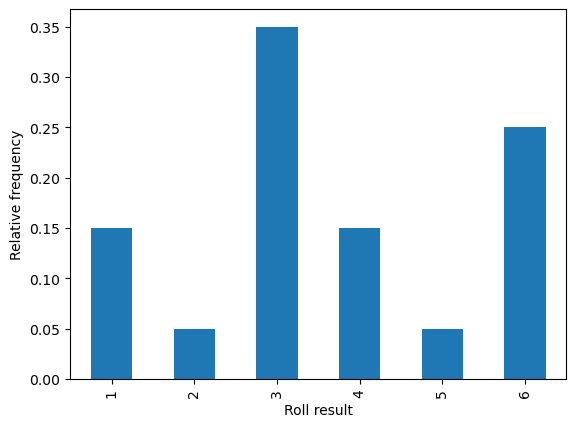

In [47]:
fig, ax = plt.subplots()
rel_frequency.plot(kind = 'bar',
                   ax = ax)

ax.set_xlabel('Roll result')
ax.set_ylabel('Relative frequency')

plt.show()

For a finite number of roles:
- relative frequencies on given run not equal to fair die expectations
- fluctuations in relative frequencies from run to run

In [54]:
def die_simulator_freq(die_sides, num_trials):
    
    # generate samples
    trial_results = pd.Series(randint.rvs(1, die_sides+1, size = num_trials))
    
    # create relative frequency series
    rel_frequency = pd.DataFrame(trial_results.value_counts(normalize = True).sort_index()).reset_index()
    rel_frequency.rename(columns = {'index': 'die_face', 'proportion': 'rel_freq'}, inplace = True)
    return rel_frequency

In [55]:
die_simulator_freq(6, 100)

,die_face,rel_freq
0,1,0.17
1,2,0.23
2,3,0.16
3,4,0.15
4,5,0.17
5,6,0.12


In [56]:

from bokeh.layouts import column,row
from bokeh.models import ColumnDataSource, TextInput, Button
from bokeh.plotting import figure, output_file, show
from bokeh.io import show, output_notebook
from bokeh.themes import Theme
import yaml
import numpy as np
output_notebook()

def bk_app(doc):
    
    rel_freq = die_simulator_freq(die_sides = 6, num_trials = 30)
    
    source = ColumnDataSource(rel_freq)
    
    # Create plots and widgets
    plot = figure(title = "Relative Frequency" )

    plot.vbar(x = 'die_face', top = 'rel_freq', source = source, color = 'lightblue', line_color = 'black' ) 


    # Create text input object
    
    n_trial = TextInput(title="Number of trials", value = '30')
    refresh = Button(label="Update", button_type="success")


    # Adding callback code
    def callback(attr, old, new):
        N = n_trial.value
        rel_freq = die_simulator_freq(die_sides = 6, num_trials = int(N)) 
        source.data = rel_freq
        
    def update():
        N = n_trial.value
        rel_freq = die_simulator_freq(die_sides = 6, num_trials = int(N)) 
        source.data = rel_freq


    n_trial.on_change('value', callback)
    refresh.on_click(update)


    doc.add_root(row(
        plot,
        column(n_trial, refresh),
    ))

    doc.theme = Theme(json=yaml.load("""
        attrs:
            figure:
                background_fill_color: white
                outline_line_color: white
                toolbar_location: above
                height: 450
                width: 450
    """, Loader=yaml.FullLoader))



Loading BokehJS ...

In [57]:
show(bk_app, notebook_url="http://localhost:8888")

#### Random Variables

#### Probability strictly speaking

$$P(b) = \lim_{N\rightarrow\infty} \frac{n_b}{N} $$


Idea is that relative frequency get close to probability:
- when number of trials ($N$) gets large enough.

Often makes sense to represent members of sample space $S$ as numbers:

$$ f: S \rightarrow \mathbb{R} $$ 
- want arithmetic and algebraic operations over them

A sample space $S =\{L, R \} $:
- random left/right walker in 1D
- molecular diffusion in a confined channel

<center><img src = "images/molecular_walk.png" ></center>
<center> 

<center><img src = "images/molecular_walk.png" ></center>
<center> 

Suggests a transformation of sample space:

$$ L \rightarrow X = -1 $$
$$ R \rightarrow X = +1 $$

where $X$ is a random variable representing the outcome of taking a step.

That is $X$ could take on either a value $\pm 1$ on a given trial.

Probability $P$ defined over random variables:
- unbiased walker
$$ P(X = - 1) = \frac{1}{2} $$
$$ P(X = + 1) = \frac{1}{2} $$

Naturally define mathematical operations to create new random variables:

- Define overall displacement after N steps:
$$ D = X_1 + X_2 + ... + X_N = \\ \sum_{i=1}^N X_i $$ with $D$ as well as each $X_i$ random variables.

Deriving quantitative relationships over/between random variables:
- will see this a lot in statistics 
- machine learning
- etc.

- Set-theoretic probability not apt for these sorts of calculations.
- In general both formulations will be useful throughout course.

**Probability with multiple observables** 

- When two or more observables are measured during a single trial.

In [543]:
x_res = [1,2,3,4,5]
y_res = [0,1,2]
counts = np.array([[80, 75, 90], [40, 65, 34], [30, 82, 100], [76, 82, 75], [60, 75, 70]]).T

gamerating_df = pd.DataFrame(counts, columns = x_res)
gamerating_df.index.name = 'GFX rating'
gamerating_df.columns.name = 'Gameplay rating'

X and Y correspond to observables.

Correspond to two entries in questionaire on a game:

- X = Gameplay rating (1-5)
- Y = Satisfied with graphics (disagree/ambivalent/agree - 0,1,2)

Measuring the response of a participant:
- X,Y treated as jointly measured random variables.

Get count distribution across X,Y for a group of respondents:

In [701]:
gamerating_df

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,80,40,30,76,60
1,75,65,82,82,75
2,90,34,100,75,70


Get the relative frequency for a given joint gameplay / GFX rating:

- Normalize by number of reviews.

In [703]:
# sums over all values in the table

N_reviews = gamerating_df.sum().sum()
print(N_reviews)

1034


Constructing the joint relative frequency table:
- The relative frequency as 

In [546]:
joint_rel_freq = gamerating_df/N_reviews
joint_rel_freq

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,0.077369,0.038685,0.029014,0.073501,0.058027
1,0.072534,0.062863,0.079304,0.079304,0.072534
2,0.087041,0.032882,0.096712,0.072534,0.067698


Summing over all rows/columns

In [704]:
joint_rel_freq.values.sum()

0.9999999999999999

In [550]:
joint_rel_freq = gamerating_df/N_reviews
joint_rel_freq

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,0.077369,0.038685,0.029014,0.073501,0.058027
1,0.072534,0.062863,0.079304,0.079304,0.072534
2,0.087041,0.032882,0.096712,0.072534,0.067698


The joint relative frequency of polling a respondent rating the game with:
- Gameplay rating 3
- Graphics rating 2

In [551]:
joint_rel_freq.loc[2, 3]

0.09671179883945841

#### Joint Probability

The probability that a given respondent, drawn at random had $X = x_i$ and $Y = y_j$.

In large N limit, we define it as a probability:
    

$$ P(X = x_i, Y = y_j) = \lim_{N\rightarrow\infty} \frac{n_{ij}}{N} $$


Can also define joint probability in terms of set elements of the event space:

$$ P(A,B) = P(A \cap B) $$

<center><img src="Images/aunionB.png" width="400"/></center>

- If $A$ represents $X = x_i$
- and $B$ represents $Y = y_j$
- then $$ P(A \cap B) $$

represents $P(X=x_i, Y = y_j)$

#### The marginal probability
- just the probabilities for each variable individually
- irrespective of other vriable

In [584]:
gamerating_df 

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,80,40,30,76,60
1,75,65,82,82,75
2,90,34,100,75,70


Calculating marginal relative frequency for GFX rating:
- Sum over all gameplay rating values

In [589]:
gamerating_df.sum(axis = 1)

GFX rating
0    286
1    379
2    369
dtype: int64

These are counts of respondents:
- for each graphics rating (regardless of their gameplay rating)

Normalize by total respondent number for marginal relative frequency 

In [607]:
marg_on_Y = \
gamerating_df.sum(axis = 1)/N_reviews

print(marg_on_Y)
# does it satisfy the axioms?
print(marg_on_Y.sum())

GFX rating
0    0.276596
1    0.366538
2    0.356867
dtype: float64
1.0


Which can be computed directly from the table of joint relative frequencies:

In [598]:
joint_rel_freq

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,0.077369,0.038685,0.029014,0.073501,0.058027
1,0.072534,0.062863,0.079304,0.079304,0.072534
2,0.087041,0.032882,0.096712,0.072534,0.067698


In [600]:
joint_rel_freq.sum(axis = 1)

GFX rating
0    0.276596
1    0.366538
2    0.356867
dtype: float64

In [601]:
marg_on_Y

GFX rating
0    0.276596
1    0.366538
2    0.356867
dtype: float64

#### Marginal Probability

Taking this to large $N$ limit to define a probability:

$$ P(Y = Y_j) = \lim_{N\rightarrow \infty}\sum_{i=1}^5\frac{n_{ij}}{N} $$ 
<br>
<center>OR</center>
<br>
$$ P(Y = Y_j) = \sum_{i=1}^5 P(X = x_i, Y=y_j) $$ 

*Marginal on Y*: $P(Y)$


Can obviously do a similar thing to get marginal on $X$:
- $P(X)$

In [603]:
joint_rel_freq.sum(axis = 0)

Gameplay rating
1    0.236944
2    0.134429
3    0.205029
4    0.225338
5    0.198259
dtype: float64

#### Conditional Probability

Often want to know:
- probability of one variable **given** that:
    - we know that the others already take on a specific value

In [605]:
gamerating_df

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,80,40,30,76,60
1,75,65,82,82,75
2,90,34,100,75,70


Given that the respondents rated the GFX rating with a 0

In [705]:
gamerating_df.loc[0,:]

Gameplay rating
1    80
2    40
3    30
4    76
5    60
Name: 0, dtype: int32

Evaluate relative frequency of a gameplay rating **given** that GFX rating was 0

In [618]:
givenGFXzero = gamerating_df.loc[0,:]
givenGFXzero

Gameplay rating
1    80
2    40
3    30
4    76
5    60
Name: 0, dtype: int32

Need to normalize by counts:
- just where GFX rating was 0.

In [624]:
relconditional = \
givenGFXzero/givenGFXzero.sum()

relconditional

Gameplay rating
1    0.279720
2    0.139860
3    0.104895
4    0.265734
5    0.209790
Name: 0, dtype: float64

What we did, more theoretically

Among the possibilities satisfying condition $Y = y_j $:
- the conditional probability that $X = x_i$  is
$$ P(X = x_i | Y = y_j ) = \lim_{N\rightarrow \infty}{\frac{n_{ij}}{r_j}} $$

<center><img src="Images/joint_table.png" width="400"/></center>

The distribution of $X$ (gameplay rating) given that $Y$ (graphics) was 1 will be different:
- taking a subset of users satisfying condition on $Y$
- calculating proabilities over only those users satisfying condition.

In [706]:
givenGFXone = gamerating_df.loc[1,:]
givenGFXone/givenGFXone.sum()

Gameplay rating
1    0.197889
2    0.171504
3    0.216359
4    0.216359
5    0.197889
Name: 1, dtype: float64

In [707]:
# compared to conditional when Y = 0

relconditional

Gameplay rating
1    0.279720
2    0.139860
3    0.104895
4    0.265734
5    0.209790
Name: 0, dtype: float64

$$ P(X | Y = 1) $$

$$ P(X | Y = 0) $$

Obviously we could also relative frequencies / probabilities for $Y$ conditioned on $X$:
 $$ P(Y | X = x_i) $$

In [631]:
gamerating_df

Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,80,40,30,76,60
1,75,65,82,82,75
2,90,34,100,75,70


Get relative frequencies for $y$:
- Given $X = 2$

In [708]:
gamerating_df.loc[:, 2]

GFX rating
0    40
1    65
2    34
Name: 2, dtype: int32

The normalized by dividing out sum over Y values:

In [709]:
norm = gamerating_df.loc[:,2].sum()
rel_freqYonX2 = gamerating_df.loc[:,2]/ norm
rel_freqYonX2 

GFX rating
0    0.287770
1    0.467626
2    0.244604
Name: 2, dtype: float64

Normalization for conditional: 
- total counts for which $X = x_i$ 

with $x_i = 2$

But this is basically just the marginal:
$$ P(X = x_i) = \frac{n_{X=x_i}}{N} $$

where $N$ is total number of responses/trials

The conditional:
$$ P(Y| X = x_i) = \frac{n_{Y = y_j, X = x_i}}{n_{X=x_i}} $$
becomes:
$$ P(Y| X = x_i) =\frac{n_{Y = y_j, X = x_i} / N}{P(X=x_i)} $$

subbing in the marginal:
 $$ n_{X=x_i} = NP(X =x_i) $$

With recognition that:

$$ \frac{n_{Y = y_j, X = x_i}}{N} = P( X = x_i, Y = y_j) $$

is the joint probability

we arrive at a very nice result:
$$ P(Y| X = x_i) =\frac{n_{Y = y_j, X = x_i} / N}{P(X=x_i)} $$

becomes

$$ P(Y| X = x_i) =\frac{P(Y = y_j, X = x_i)}{P(X=x_i)} $$

The formula:
$$ P(Y| X) =\frac{P(X, Y)}{P(X)} $$

Written in event space notation as:
    
   $$  P(A | B) = \frac{ P(A \cap B)}{P(B)} $$

joins the conditional, the joint, and the marginal probabilities in a single relationship

Don't believe me?

- Get probability that a respondent rated 3 for gameplay given they rated graphics at 0.

$$ P(gplay = 3 | gfx = 0) = \frac{P(gplay = 3 , gfx = 0)}{P(gfx = 0)} $$

The joint:

$$ P(gplay = 3 , gfx = 0) $$

probability that a respondent rated 3 for gameplay and rated graphics at 0 **out of all respondents**

In [666]:
# get the joint
joint_03 = joint_rel_freq.loc[0,3]
print(joint_03)
joint_rel_freq

0.029013539651837523


Gameplay rating,1,2,3,4,5
GFX rating,,,,,
0,0.077369,0.038685,0.029014,0.073501,0.058027
1,0.072534,0.062863,0.079304,0.079304,0.072534
2,0.087041,0.032882,0.096712,0.072534,0.067698


The marginal:

$$ P(gfx = 0) $$

- probability that respondent rated graphics at 0 **out of all respondents** 
- regardless of what they rated gameplay

In [667]:
# get the marginal of graphics
marginal_0 = joint_rel_freq.sum(axis = 1)[0]
print(marginal_0)
joint_rel_freq.sum(axis = 1)

0.2765957446808511


GFX rating
0    0.276596
1    0.366538
2    0.356867
dtype: float64

Recall when we first calculated conditional:
- in subset of those who rated $gfx = 0$
- probability of different gameplay ratings

In [663]:
# compared to conditional for gameplay 
# given graphics = 0

relconditional

Gameplay rating
1    0.279720
2    0.139860
3    0.104895
4    0.265734
5    0.209790
Name: 0, dtype: float64

Compare to calculation from formula:

$$ P(gplay = 3 | gfx = 0) \\
= \frac{P(gplay = 3 , gfx = 0)}{P(gfx = 0)} $$

In [660]:
joint_03/marginal_0

0.10489510489510488

Simple interpretation:

$$ P(X = x_i, Y = y_j) = \\ P(X = x_i | Y = y_j)P(Y = y_j) $$

Probability $X= x_i$ and $Y = y_j$ :
- out of **all possibilities for X and Y**

is product of:
$$ P(X = x_i | Y = y_j) $$ 

Probability $X= x_i$: 
- out of a  subset: all possibilities for $X$ and where $ Y = y_j$

$$ P(Y = y_j) $$ 

- probability that given $ Y = y_j$ out of all possibilities for $Y$

#### Statistically Independent Events
- when random variables independent:
- joint probability takes on simple form

$$ P(X = x_i, Y = y_j) = \\ P(X = x_i | Y = y_j)P(Y = y_j) $$

Probability $X= x_i$ and $Y = y_j$ :
- out of **all possibilities for X and Y**



$$P(X = x_i | Y = y_j) = P(X = x_i)$$

- as the probability of getting X value
- doesn't depend on Y.

For independent events:
    
$$ P(X = x_i, Y = y_j) = \\ P(X = x_i)P(Y = y_j) $$

joint is product of probabilities.

or in set theory notation:

$$ P(A \cap B) = P(A)P(B) $$

Another consequence of connection between conditionals, marginals, and joint:

$$ P(X = x_i, Y = y_j) = \\ P(X = x_i | Y = y_j)P(Y = y_j) $$

$$ P(X = x_i, Y = y_j) = \\ P(Y = x_j | X = x_i)P(X = x_i) $$

Doesn't matter which way we go

Naturally lead to Bayes' theorem: we'll interpret later.

$$ P(X = x_i | Y = y_j)P(Y = y_j) = P(Y = y_j | X = x_i)P(X = x_i)$$
<br><br>

implies:

<center><b>Bayes' Theorem</b></center>

$$ P(X = x_i | Y = y_j) = \frac{P(Y = y_j | X = x_i)P(X = x_i)}{P(Y = y_j)} $$

Theorem seems very innocuous: 
- We will interpret it later..
- Of great practical importance in machine learning and statistics.
- One of the most important theorems concerning the foundation of knowledge.